## 이 튜토리얼은 https://www.kaggle.com/wltjd54/insurance-prediction-full-ver (작성자: @wltjd54)께서 작성하신 것입니다. 

# Machine Learning Tutorial

안녕하세요 빅분기 실기 준비자 여러분! 머신러닝 튜토리얼에 오신 것을 환영합니다. 

비록 제가 머신러닝 튜토리얼 작성을 맡게 되었습니다만, 저 역시 아직 초보자이고 배울 점이 많습니다. 다만 이번 기회를 통해 저 역시도 머신러닝을 어떻게 수행하는지 다시 한 번 정리할 수 있을 것 같아서 도전을 해보게 되었습니다. 제가 코딩과 머신러닝을 처음 배울 때도 그랬고, 지금도 그렇게 하고 있지만 다른 사람들이 미리 해놓은 결과물을 보고 무작정 따라하는 것이 도움이 많이 되었던 것 같습니다. 무작정 따라하면서 익숙해지게 되면, 그 다음에 코드를 수정해보거나 다르게 만져보면서 자신의 것으로 만들어갈 수 있을 것입니다.</font>

저 역시도 이번 기회를 통해 머신러닝에 제가 처음 입문했을 때의 기억을 되살려보면서 여러분께 작은 도움이 되었으면 좋겠다는 마음으로 진행해보겠습니다.

(한 마디만 덧붙이자면, 코딩을 배울 때는 구글과 친해지는 것이 좋습니다! 궁금하신 부분 구글에 치면 거의 대부분 답을 다 얻을 수 있고, 특히 요즘은 한글로 된 좋은 블로그도 많습니다. 저 역시도 코딩하면서 늘었다고 확실하게 말할 수 있는 건 구글 서치 능력입니다...ㅎㅎ)

# Data Explanation

오늘 저희는 의료보험 데이터를 활용해 한 사람이 보험료를 얼마나 낼지를 예측하는 회귀 문제를 다뤄보겠습니다. 위의 input에 추가된 데이터에서 바로 이용할 수 있고, 데이터를 이루고 있는 column들에 대한 설명은 다음과 같습니다.

* Age: 피보험자의 나이
* Sex: 피보험자의 성별
* BMI: 피보험자의 체질량 지수 - $\frac{Weight\:(kg)}{\left(Height\:(m)\right)^{2}}$
* Children: 피보험자의 자녀의 수
* Smoker: 흡연 여부 (yes / no)
* Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
* Charges: 보험료

# Data and Library Import

먼저, 데이터와 기본 라이브러리를 불러오겠습니다.

일반적으로, 스크립트 환경에서 작성하든 노트북에서 작성하든 첫 부분에 해당 분석에서 사용할, 또는 사용할 법한 라이브러리를 모두 불러오고 시작합니다. 다만, 저는 처음 배울 때 항상 **'어떤 것을 쓸 줄 알고 미리 다 불러오는 거지?'**라는 의문이 들었습니다. 물론 데이터 분석 및 머신러닝에서 사용하게 되는 라이브러리는 정해져 있는 편이지만, 이렇게 라이브러리를 처음부터 몽땅 불러오고 시작하는 것은 개인적으로 다음의 두 가지 이유가 있다고 생각합니다.

* 첫째로, 보기에 깔끔합니다. 보기에 깔끔하게 코드를 짜는 것 역시 중요한 게, 처음 코드를 짤 때는 그 상황에 몰입해 있기 때문에 어떻게 짜든 이해하지만, 며칠만 지나고 다시 보면 이게 어떻게 짠 것인지 모르는 경우도 많습니다. 아무래도 그때그때 라이브러리를 불러오는 것보다, 라이브러리 불러오는 코드는 맨 위에 적어놓고 시작하는 게 깔끔할 겁니다.

* 둘째로, 쓰기에 편합니다. 미리 모든 라이브러리를 선언해놓고 가면, 필요할 때마다 불러오는 경우에 비해서 편하고 자유롭게 코드를 작성하고 수정할 수가 있습니다.

이런 이유로 저도 여기서는 모든 라이브러리를 최대한 써놓고 시작하겠습니다.

하지만, 제가 드리고 싶은 말씀은, 파이썬은 코드를 line-by-line으로 읽으면서 순차적으로 처리하는 언어이기 때문에, 사실 **라이브러리를 필요한 그때 그때 선언해도 상관 없다**는 것입니다. 즉, 미리 어떤 라이브러리를 불러와야 할지 고민하지 말고 진행하다가 어떤 라이브러리가 필요하다 싶으면 그때 불러와도 됩니다!

In [31]:
# library import
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, StandardScaler, 
                                   MinMaxScaler, PowerTransformer, QuantileTransformer)
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings(action='ignore')

In [32]:
# data import & view head
df = pd.read_csv('../input/insurance/insurance.csv', engine='python')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA (Exploratory Data Analysis)

보통 '탐색적 데이터 분석'이라고 부르며, 데이터의 분포 또는 상관관계를 살펴보는 단계입니다. 이를 통해 특징을 파악하고, 학습이 더욱 잘 이루어질 수 있도록 변환시킬 변수를 찾기도 합니다.

In [33]:
# 데이터에 결측치는 없는지, 각 데이터의 자료형은 어떤 것인지 살펴봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


다행히 결측치는 없어 보이며, 성별(sex), 흡연여부(smoker), 거주지역(region) column(보통 feature라고 부릅니다)을 제외한 column들은 모두 숫자(정수와 실수)로 이루어져 있습니다. 한편, 'object'는 column에 여러 자료형이 섞여있거나, 문자열(string)에 붙는 자료형이라고 합니다.

In [34]:
# 데이터의 평균과 표준편차, 최댓값, 최솟값, 사분위수를 표로 한 번 살펴보겠습니다.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


describe 메소드는 기본적으로 숫자형 데이터에 대해서만 작동합니다. 살펴보니 다음과 같은 특징들이 보입니다.

* 자녀의 수(children)의 표준편차가 평균과 비슷한 수준입니다. 이는 feature의 분포가 매우 넓게 퍼져 있음을 의미합니다. 아마 히스토그램을 그려봐야 알겠지만 차후에 분포를 모아주는 작업이 필요할 수도 있습니다.

* 여기서는 보험료(charges)가 종속변수이기 때문에 해당 사항이 없지만, 만일 독립변수(feature)라고 가정한다면,
    - 보험료와 다른 feqture들에 대해서 숫자 단위 차이가 극심하게 나는 것을 알 수 있습니다. age와 bmi는 숫자가 커봤자 두 자리인데, 보험료는 만 단위까지 올라갑니다. 이렇게 feature 사이의 단위 차이가 클 경우, 단위가 큰 feature의 영향을 지나치게 많이 받을 가능성이 있고, 따라서 학습이 제대로 이루어지지 않을 수 있습니다.
    - 따라서 보통 단위 차이가 큰 feature들은 단위를 맞춰주는 작업(Scaling)이 필요합니다. 
    - 물론, 앞서도 말했듯이 여기서는 보험료가 종속변수이기 때문에 scaling을 해주지 않겠습니다.

## Visualization

물론 실제 시험에서는 시각화가 불가능하기 때문에 사용하면 안 되지만, 여기서는 수행해보도록 하겠습니다.

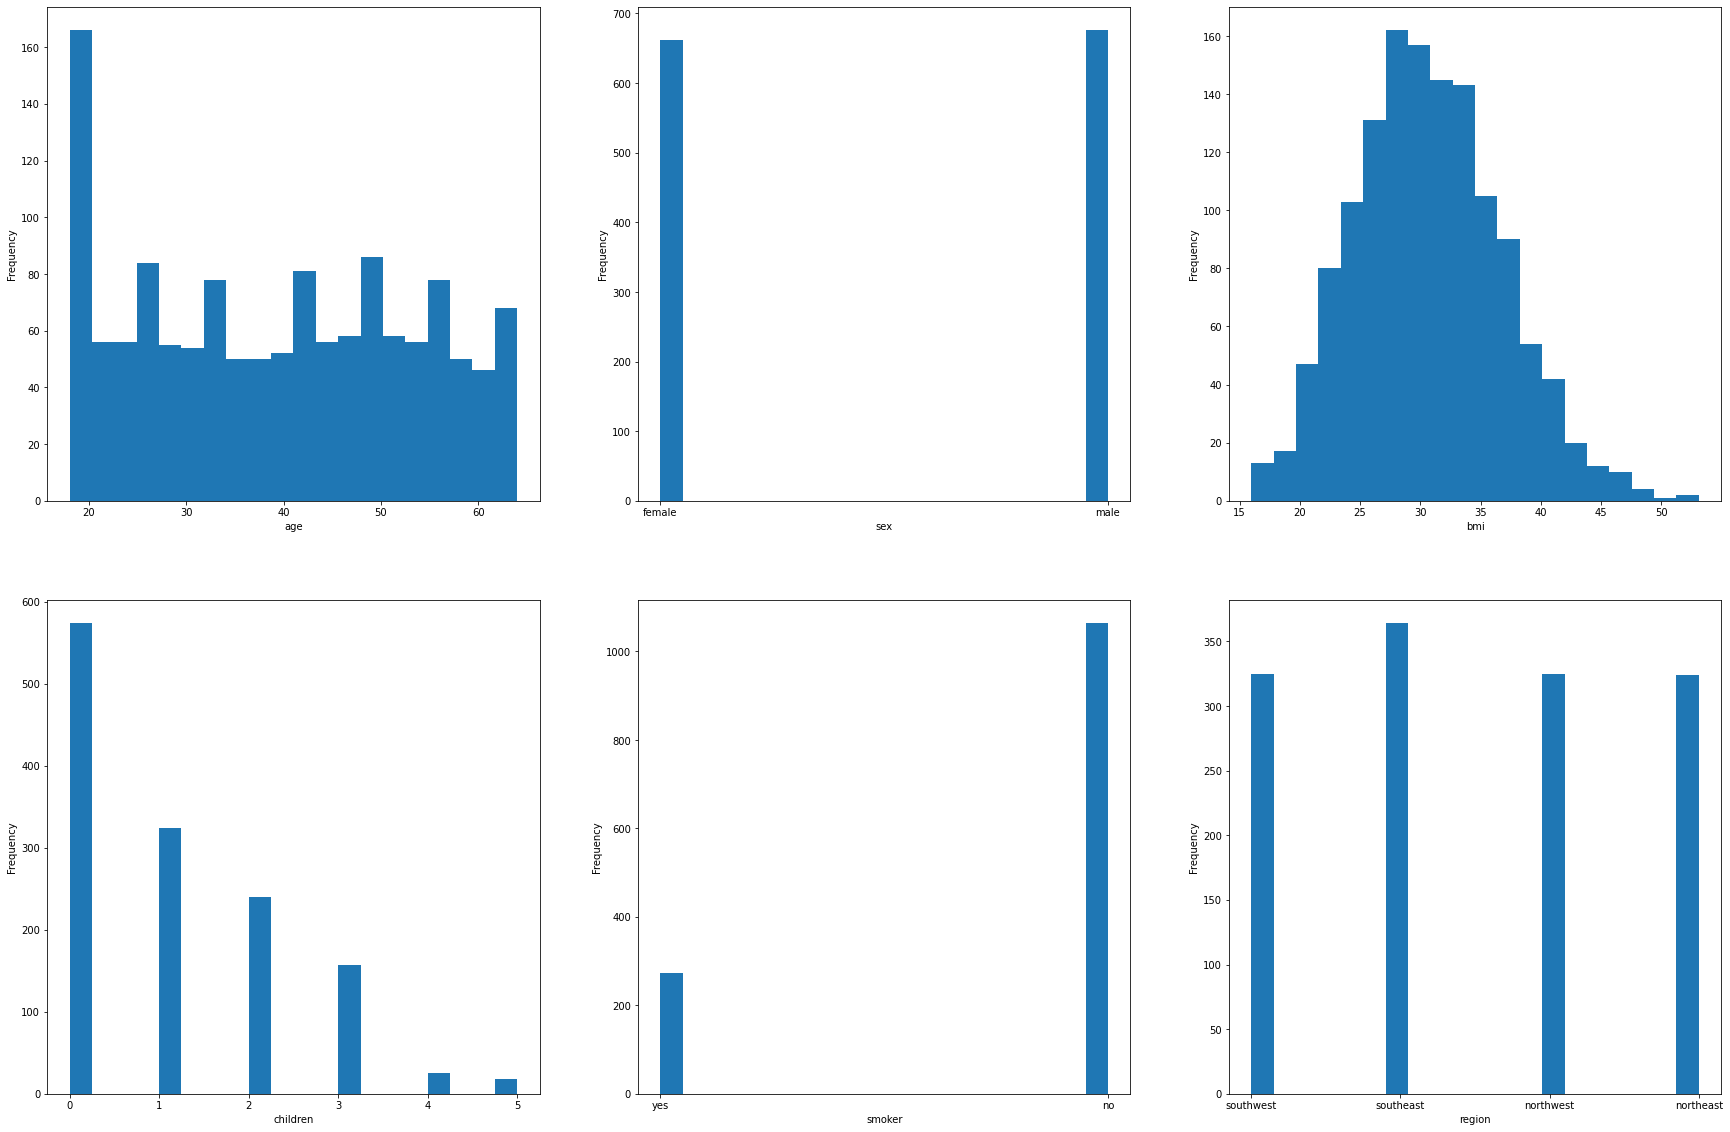

In [35]:
# 히스토그램을 통해 각 변수들의 분포를 살펴봅니다.
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

idx = 0 # 보험료를 제외한 feature들을 지정할 인덱스입니다.
for i in range(2): # subplot들의 행(row)
    for j in range(3): # subplot들의 열(column)
        colname = list(df.columns)[idx]
        ax[i][j].hist(df[colname], bins=20)
        ax[i][j].set_xlabel(colname)
        ax[i][j].set_ylabel('Frequency')
        
        idx += 1

분포를 살펴본 결과 다음과 같은 특징을 찾을 수 있습니다.

* 나이가 20대보다 어린 사람들의 숫자가 매우 많으며, 역시 그 때문에 자녀의 숫자 역시 0에 매우 많은 도수가 몰려있다는 것을 알 수 있습니다. 따라서 이러한 분포에 맞춰서 training set과 test set을 나누는 것이 중요해 보입니다.

* 한편, 자녀가 4명 이상인 사람들의 수는 이상치에 가까워 보이는데, 이는 뒤에서 다시 한 번 확인해보겠습니다.

* 남녀 비율은 거의 비슷하며, 흡연자에 비해 비흡연자의 비중이 높습니다(이 역시 나이와 관련이 있어 보입니다.). 그리고 거주지역의 경우 southeast에 거주하는 사람들이 다른 지역에 비해 많지만, 그래도 그 분포가 거의 일정한 것으로 보입니다.

* BMI의 경우 약간은 왼쪽으로 치우친 분포를 보이고, 무리에서 떨어진 값이 보입니다. 이 역시 다시 한 번 확인해보겠습니다.

## 상관관계 파악 및 구간 만들기

특히 숫자형 변수들에 대해서 먼저 살펴보겠습니다. 상관계수 행렬과 산점도를 살펴봅니다.

In [36]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

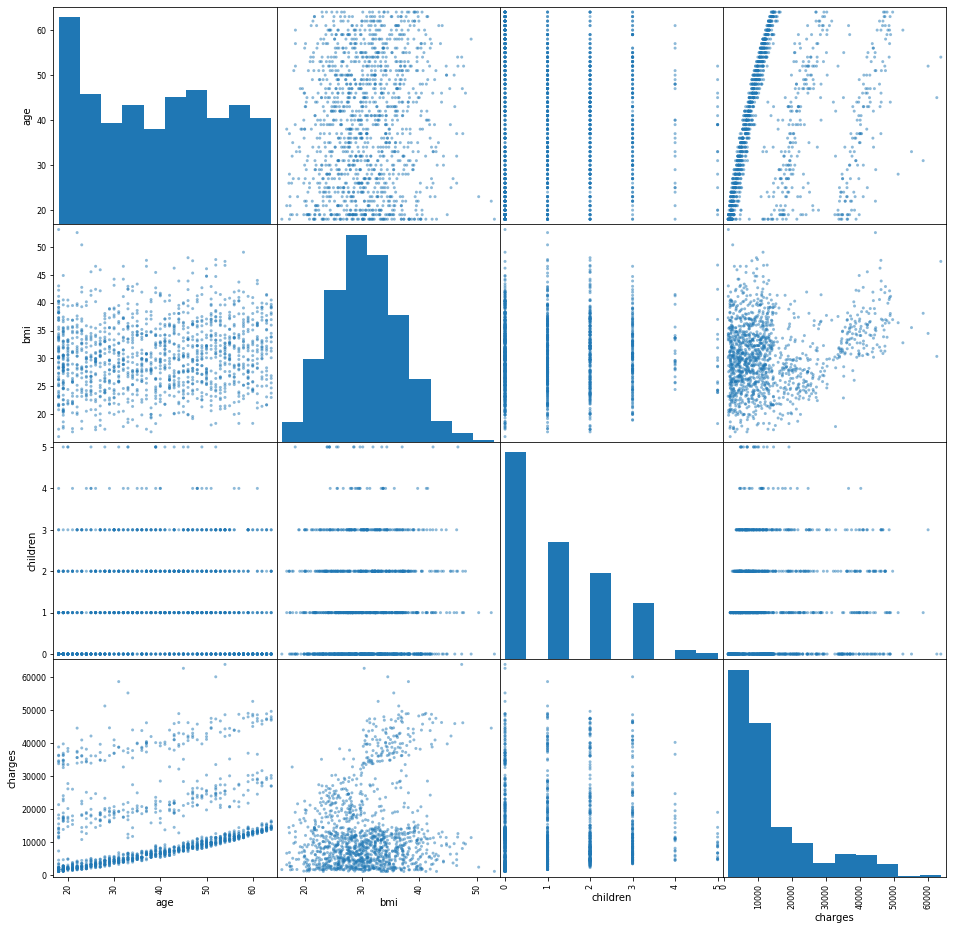

In [37]:
pd.plotting.scatter_matrix(df, figsize=(16, 16))

상관관계를 살펴보니 나이와 종속변수인 보험료 사이의 상관계수가 가장 높은 것을 알 수 있습니다. 그런데 데이터 상에서 20대 이하에 분포가 매우 많이 몰려있음을 알 수 있습니다. 따라서 이 분포에 맞춰서 training set과 test set을 나누는 게 중요해 보입니다. 

따라서 이를 위해 연령별 구간으로 나누겠습니다. 다만 18세와 19세에 몰려 있는 것을 최대한 감안하기 위해 20대 이상부터는 5세 단위로 끊겠습니다.

In [38]:
print(df['age'].min())
print(df['age'].max())

18
64


In [39]:
print(df.age.min())
print(df.age.max())

18
64


In [40]:
# 연령별 구간 설정
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
age_bin = pd.cut(df['age'], bins=bins, labels=[i+1 for i in range(len(bins)-1)])
df['age_bin'] = age_bin
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,4
4,32,male,28.880,0,no,northwest,3866.85520,4


## 이상치 탐지

<AxesSubplot:ylabel='bmi'>

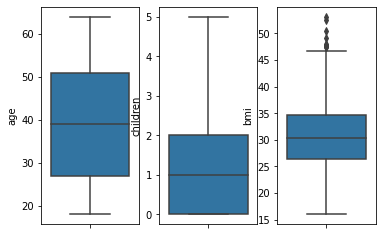

In [41]:
# 이상치 탐지를 위해 boxplot을 그려보겠습니다.
plt.subplot(1,3,1)
sns.boxplot(data=df, y='age')
plt.subplot(1,3,2)
sns.boxplot(data=df, y='children')
plt.subplot(1,3,3)
sns.boxplot(data=df, y='bmi')

물론 위의 히스토그램에서 보았듯이 5명의 자녀를 가진 관측치의 숫자는 총 18명으로 매우 그 수가 적지만, 다음의 이유들로 여기서는 제외하지 않겠습니다.

* 애초에 변수의 범위가 0에서 5 사이의 정수로 주어져 있기 때문에, 5명의 자녀를 가진 사람들이 다른 데이터에 대해서 뚝 떨어져 있다고 보기는 어렵습니다.

* 다른 변수들에 비해서 보험료에 미치는 영향이 매우 작다는 것(상관계수 약 0.068)을 알 수 있습니다. 이상치는 종속변수를 예측하는 데 있어 영향을 많이 미치는 변수를 중심으로 제거하는 것이 중요합니다.

다만, boxplot을 그려보니 BMI의 값들이 심상치 않습니다. 가장 위에 위치한 직선으로부터 벗어난 값들이 보이는데, 이 값들이 outlier일 가능성이 높습니다. IQR을 통해 이상치의 존재를 파악해보겠습니다.

In [42]:
# IQR(Q3 - Q1)로부터 이상치 파악하기
bmi_q1 = df['bmi'].quantile(q=0.25)
bmi_q3 = df['bmi'].quantile(q=0.75)
iqr = bmi_q3 - bmi_q1

# (q1 - (iqr * 1.5))와 (q3 + (iqr * 1.5))를 벗어난 값이 이상치입니다.
condi1 = (df['bmi'] < (bmi_q1 - (1.5 * iqr)))
condi2 = (df['bmi'] > (bmi_q3 + (1.5 * iqr)))
outliers = df[condi1 | condi2]
outliers['bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

총 9개의 이상치가 발견되었습니다! 이들 인덱스에 해당하는 전체 데이터를 한 번 살펴보고, 한 번 지워보겠습니다.

In [43]:
outliers

,age,sex,bmi,children,smoker,region,charges,age_bin
116,58,male,49.06,0,no,southeast,11381.32540,9
286,46,female,48.07,2,no,northeast,9432.92530,7
401,47,male,47.52,1,no,southeast,8083.91980,7
543,54,female,47.41,0,yes,southeast,63770.42801,8
847,23,male,50.38,1,no,southeast,2438.05520,2
860,37,female,47.60,2,yes,southwest,46113.51100,5
1047,22,male,52.58,1,yes,southeast,44501.39820,2
1088,52,male,47.74,1,no,southeast,9748.91060,8
1317,18,male,53.13,0,no,southeast,1163.46270,1


In [44]:
df.drop(outliers.index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1329 non-null   int64   
 1   sex       1329 non-null   object  
 2   bmi       1329 non-null   float64 
 3   children  1329 non-null   int64   
 4   smoker    1329 non-null   object  
 5   region    1329 non-null   object  
 6   charges   1329 non-null   float64 
 7   age_bin   1329 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 84.7+ KB


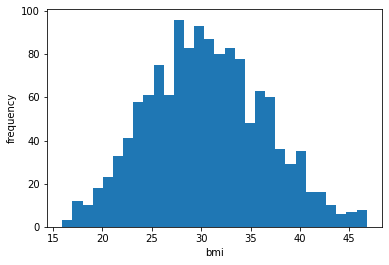

In [45]:
# bmi의 분포를 다시 한 번 그려봅니다.
plt.figsize = (10, 10)
plt.hist(df['bmi'], bins=30)
plt.xlabel('bmi')
plt.ylabel('frequency')
plt.show()

# Scaling, Transforming and Encoding

## Scaling

Scaling이란 변수의 단위를 조정하기 위해 변수를 변환하는 작업을 말합니다. 대표적인 scaling에는 표준화(Standardization)와 정규화(Normalization)가 있는데, 각각의 용어는 다음의 차이가 있다고 합니다.

* 정규화(Normalization)란 변수의 범위를 $[0, 1]$ 사이로 옮기는 작업을 의미합니다. 이를 위해 주로 사용하는 Scikit-learn 패키지로는 MinMaxScaler가 있습니다. MinMaxScaler를 수식으로 쓰면 아래와 같은데, 여기서 $X$가 개별 변수, $X_{min}$이 변수의 최솟값, 그리고 $X_{max}$가 변수의 최댓값입니다.

$$ \frac{X - X_{min}}{X_{max} - X_{min}} $$

* 표준화(Standardization)란 변수로부터 평균값을 빼고, 다시 변수의 표준편차로 나누어 결과적으로 변수가 평균 0, 표준편차 1을 갖도록 맞춰주는 작업입니다. 이를 위해 주로 사용하는 Scikit-learn 패키지로는 StandardScaler가 있습니다. StandardScaler를 수식으로 쓰면 아래와 같습니다.

$$ \frac{X - \bar{X}}{\sigma_{X}} $$

단, 주의할 점은 Scikit-learn의 패키지로 scaling을 진행할 때 **Training set에만 fitting을 해주고, Test set에는 fitting을 해주면 안 된다는 점**입니다.

Scikit-learn의 MinMaxScaler와 StandardScaler에는 각각 fit, transform, 그리고 fit_transform의 메소드가 있습니다. StandardScaler를 예시로 들자면, fit 메소드는 변수의 평균과 표준편차를 학습하고, transform은 fit에서 학습된 평균과 표준편차에 따라서 실제 변수를 변환하는 메소드입니다. fit_transform은 이 두 단계를 한 번에 수행합니다. 

다만 이때 Test set에도 fitting을 해주게 되면 Training set에는 존재하지 않는 새로운 정보(Test set의 평균과 표준편차)가 사용되는 꼴이기 때문에, 학습이 제대로 이루어지지 않습니다. 이를 **데이터 누수(Data Leakage)**라고 부릅니다. 따라서 보통 scaling할 변수에 대해서, training set의 데이터에 fit 메소드를 사용하고, 그렇게 fit한 결과를 가지고 training set과 test set을 동시에 변환시킵니다.

## Normal Transformation

다만, 위의 Scaling은 단위만 변환해줄 뿐 변수의 분포 형태를 바꾸지는 않습니다. 하지만 일반적으로 machine learning에서 학습이 잘 되기 위해서는 설명변수가 최대한 **정규분포**를 따를수록 좋습니다. 따라서 정규분포의 형태를 따르지 않는 변수들을 최대한 정규분포에 가깝게 변수를 변환하는 작업이 필요하며, 이를 정규변환(Normal Transformation)이라고 부릅니다.

변수가 정규분포에 가깝도록 변환하는 방법에는 보통 아래의 3가지 방법을 사용합니다.

* 로그 변환: 변수에 로그를 취해주면 정규분포의 형태와 가깝게 변환되는 경우가 있습니다. 이를 위해서 np.log를 기본적으로 사용하고, 변수에 0이 포함된 경우 np.log1p를 사용합니다.
    - 다만, 로그의 특성상 0보다 작은 값이 있는 변수에는 사용할 수 없습니다.
    
    
* Power Transformation: 특정한 수식에 따라서 변수를 변환합니다. 주로 사용하는 방법으로는 아래의 두 가지가 있으며, 자세한 내용은 아래의 블로그를 참조하면 좋을 것 같습니다.
    - Box-Cox Transformation:
    - Yeo-Johnson Transformation
    - For more: [[데이터 전처리] Yeo Johnson 변환](https://m-insideout.tistory.com/5)

다만 Box-Cox 변환 역시 0보다 큰 변수에 대해서만 사용할 수 있으며, Yeo-Johnson은 변수의 부호와 관계 없이 사용할 수 있다고 하며, Scikit-learn에서는 preprocessing의 power_transform 라이브러리로 사용할 수 있습니다.

* Quantile Transformation: Quantile function이란 수학적으로 확률값이 주어지면, 미리 정한 분포에 따라서 그에 상응하는 $x$값을 반환하는 함수라고 합니다. 여기서 중요한 점은 이 함수를 사용하면 변수에 있는 데이터들의 순위가 매겨지고 분석자가 지정한 분포의 형태로 바뀐다고 합니다.
    - Scikit-learn에서는 preprocessing의 QuantileTransformer로 사용할 수 있습니다.
    - 원칙적으로 quantile function에 들어가는 input은 [0, 1] 사이가 되어야 하지만, scikit-learn의 QuantileTransformer 라이브러리는 input의 구간을 맞춰주지 않아도 됩니다.

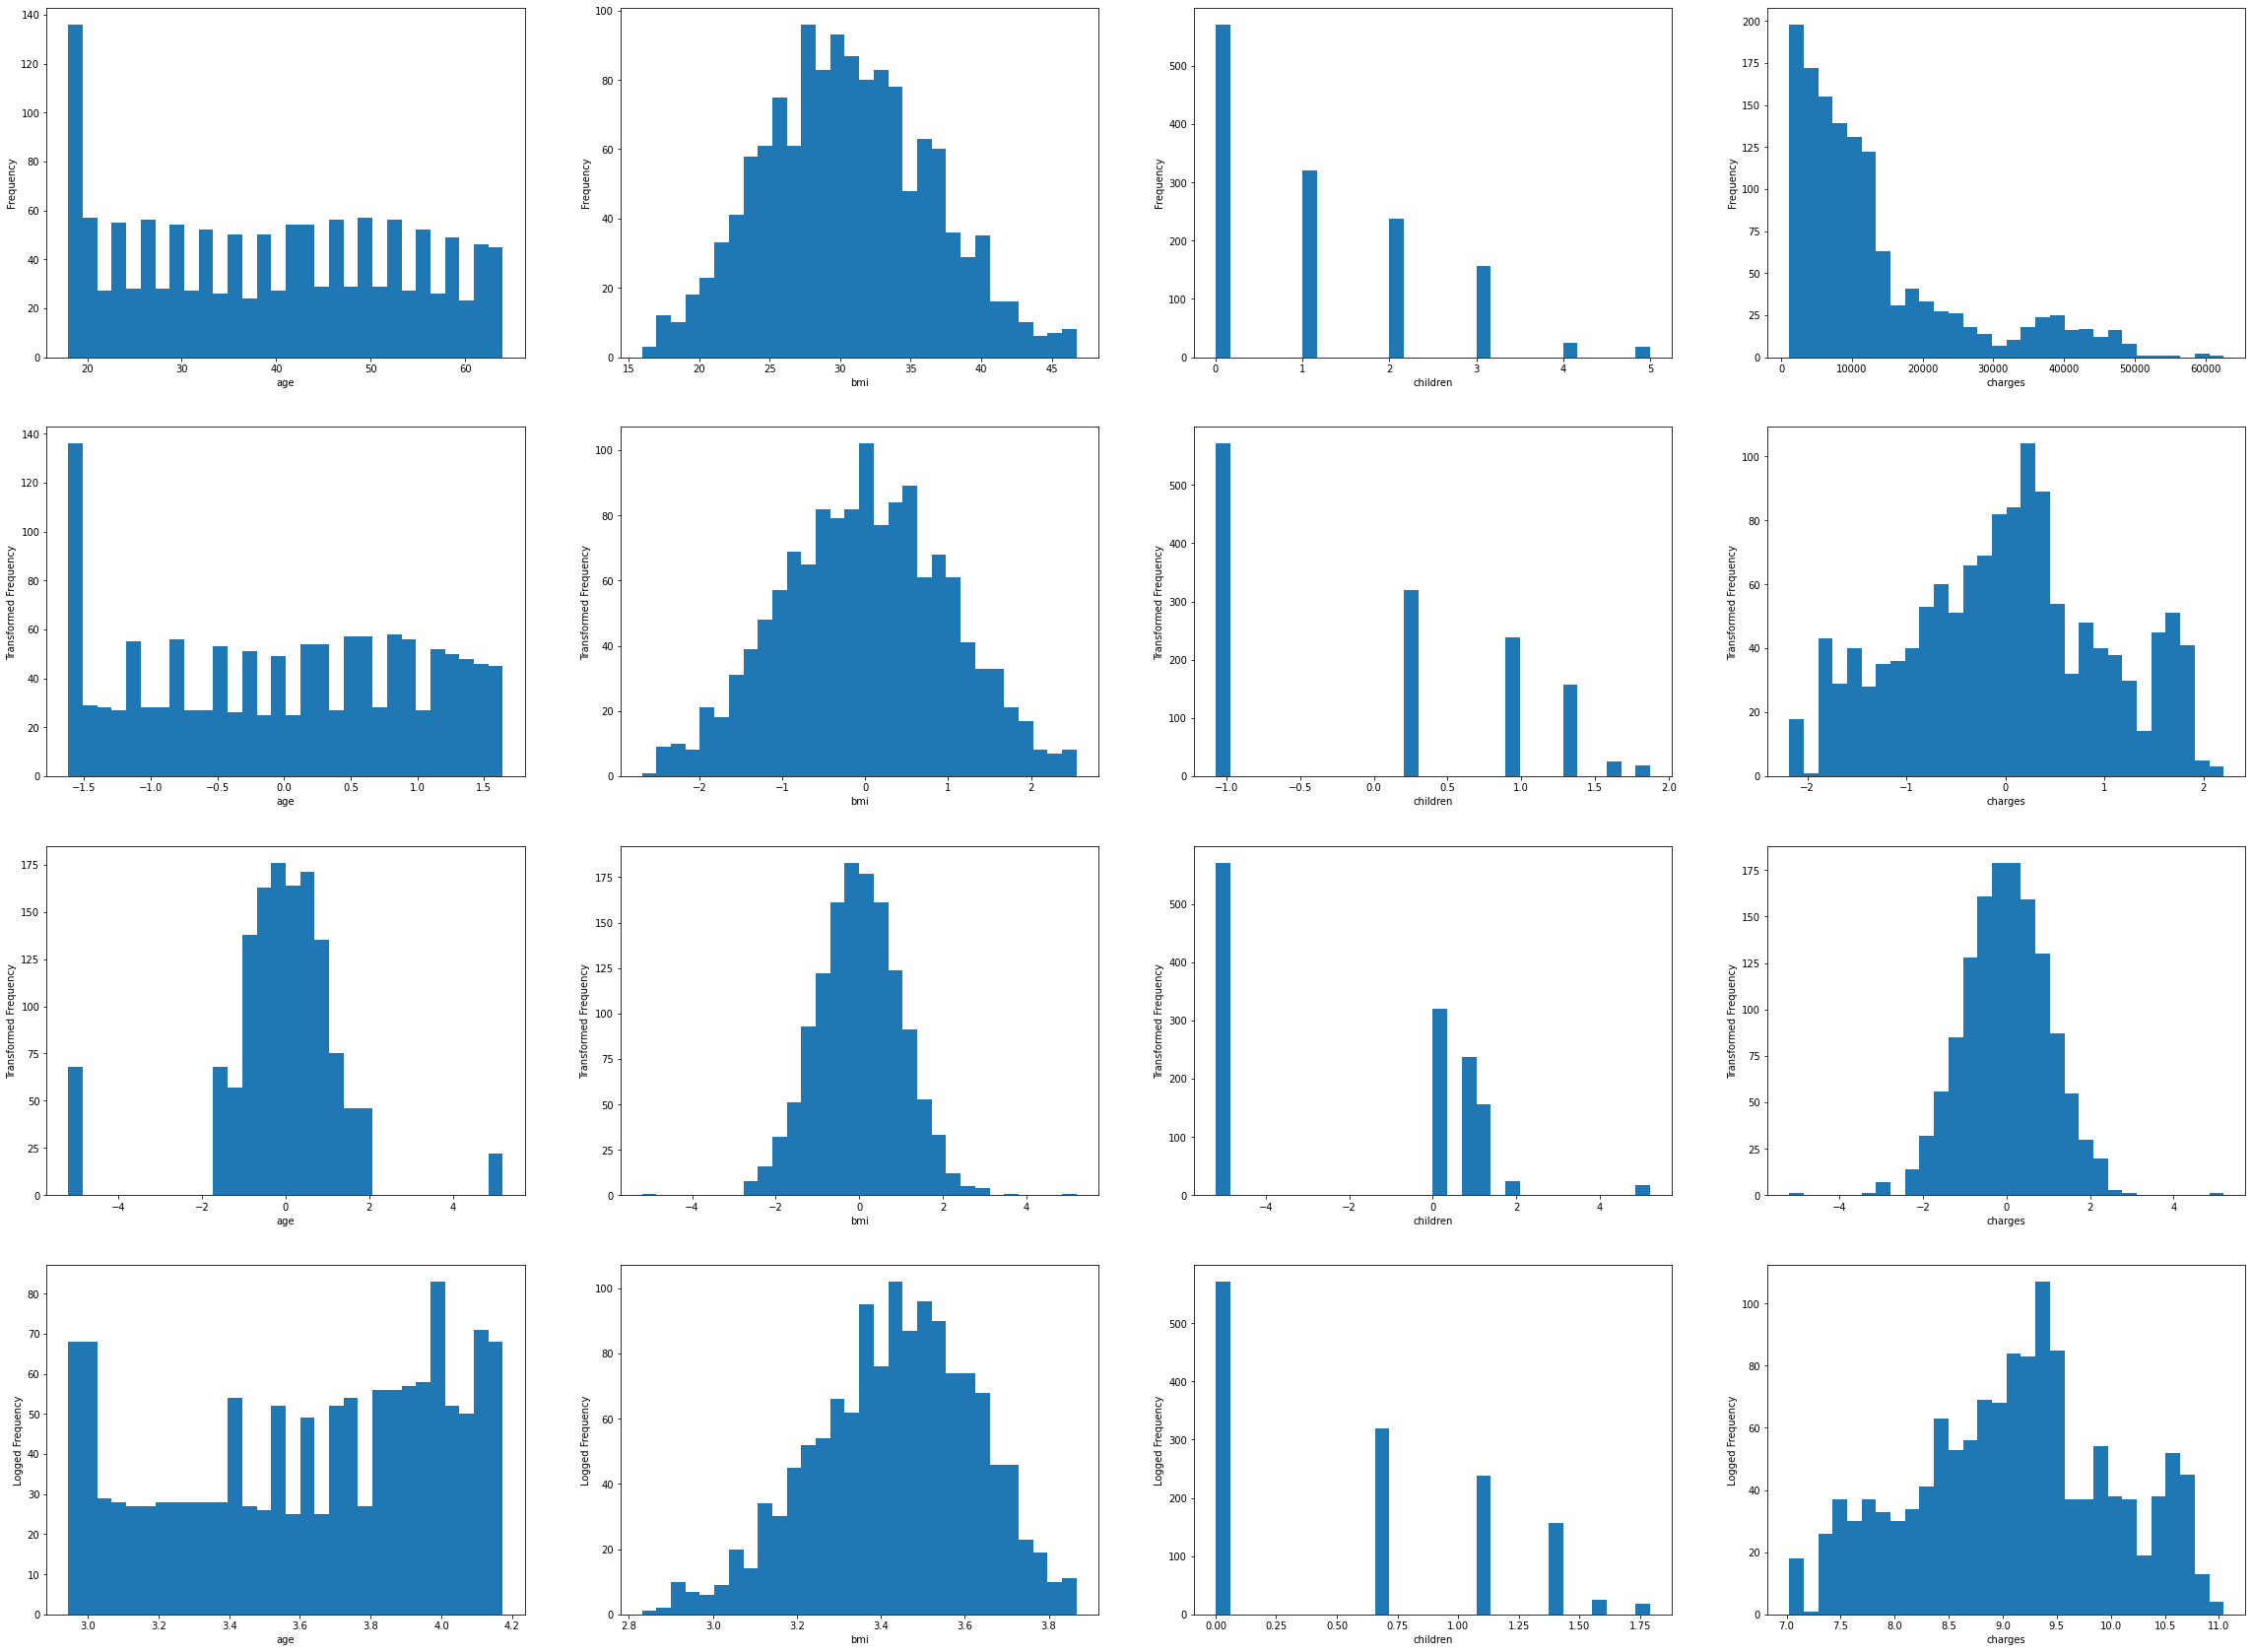

In [46]:
# 숫자형 변수에 대해서 Box-Cox transformation, Quantile transformation, 그리고 로그변환을 진행해보겠습니다.
to_scale = ['age', 'bmi', 'children', 'charges']
df_to_scale = df[to_scale].copy()

quantile = QuantileTransformer(n_quantiles=100, random_state=42, output_distribution='normal')
power = PowerTransformer(method='yeo-johnson')
q_scaled = quantile.fit_transform(df_to_scale)
yj = power.fit_transform(df_to_scale)

q_scaled_df = pd.DataFrame(q_scaled, columns=to_scale)
scaled_df = pd.DataFrame(yj, columns=to_scale)
logged_df = pd.DataFrame(np.log1p(df_to_scale), columns=to_scale)

# plt를 사용한 코드
fig, ax = plt.subplots(4, 4, figsize=(40, 30))

for i in range(4):
    idx = 0
    for j in range(4): # subplot들의 열(column)
        colname = to_scale[idx]
        if i == 0:
            ax[i][j].hist(df_to_scale[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Frequency')
        elif i == 1:
            ax[i][j].hist(scaled_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Transformed Frequency')
        elif i == 2:
            ax[i][j].hist(q_scaled_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Transformed Frequency')
        elif i == 3:
            ax[i][j].hist(logged_df[colname], bins=30)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Logged Frequency')
            
        idx += 1

정규화를 시키고 보니 특히 BMI feature가 정규분포에 가까워졌음을 확인할 수 있습니다. 따라서 두 feature에 대해서 quantile transformation을 Training set과 Test set에 적용하겠습니다. 그런 다음, 모든 변수의 단위와 분포를 맞춰주기 위해서 standard scaling을 진행하겠습니다.

In [47]:
# 먼저 training set과 test set으로 구분합니다.
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=X['age_bin'])

In [48]:
# Quantile Transformation
to_scale = ['age', 'bmi']

quantile = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')

for col in to_scale:
    quantile.fit(X_train[[col]])
    X_train[col] = quantile.transform(X_train[[col]]).flatten()
    X_test[col] = quantile.transform(X_test[[col]]).flatten()

변환된 결과를 살펴보겠습니다.

In [49]:
print(X_train.isnull().sum())
X_train.head()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
age_bin     0
dtype: int64


,age,sex,bmi,children,smoker,region,age_bin
648,-5.199338,male,-0.304524,0,no,northeast,1
1082,-0.046436,male,-1.565391,1,no,northwest,5
966,0.692077,male,-0.934341,2,yes,northwest,8
1077,-1.110772,male,-0.711394,0,no,northeast,2
1086,0.967422,male,-0.231948,0,no,northeast,8


In [50]:
print(X_test.isnull().sum())
X_test.head()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
age_bin     0
dtype: int64


,age,sex,bmi,children,smoker,region,age_bin
453,-1.220640,male,-0.111924,0,no,northwest,1
142,-0.253347,male,-0.841149,2,yes,southeast,4
68,0.046436,female,0.900041,0,no,southeast,5
534,5.199338,male,1.413604,0,no,southeast,10
658,0.492703,female,0.856080,1,no,northeast,7


In [51]:
# 이제 단위와 분포를 맞추기 위해 표준화를 진행합니다.
cols = ['age', 'bmi', 'children']
for col in cols:
    std = StandardScaler()
    std.fit(X_train[[col]])
    X_train[col] = std.transform(X_train[[col]]).flatten()
    X_test[col] = std.transform(X_test[[col]]).flatten()
    
X_train.describe()

,age,bmi,children
count,9.960000e+02,9.960000e+02,9.960000e+02
mean,-4.790345e-17,-3.611569e-17,2.049760e-16
std,1.000502e+00,1.000502e+00,1.000502e+00
min,-3.211145e+00,-5.556441e+00,-9.000663e-01
25%,-3.375675e-01,-7.281608e-01,-9.000663e-01
50%,6.985223e-02,-6.246384e-03,-9.533916e-02
75%,5.065816e-01,6.780094e-01,7.093880e-01
max,3.350850e+00,5.563261e+00,3.123570e+00


모두 평균이 0, 표준편차 1로 맞춰졌습니다.

이제, 범주형 변수인 성별, 거주지역, 흡연자 여부를 처리하도록 하겠습니다.

In [52]:
# one-hot encoding을 사용해 성별을 바꿔보겠습니다.
onehot_sex = OneHotEncoder()
sex_train = X_train[['sex']]
sex_test = X_test[['sex']]

onehot_sex.fit(sex_train) # sklearn의 OneHotEncoder는 2차원 배열(또는 데이터프레임)이 input으로 들어가야 합니다.
sex_train_onehot = onehot_sex.transform(sex_train).toarray()
sex_test_onehot = onehot_sex.transform(sex_test).toarray()

X_train['sex'] = sex_train_onehot[:, 1].astype(np.uint8) # 여성을 0, 남성을 1로 두고, 정수형으로 바꾸겠습니다.
X_test['sex'] = sex_test_onehot[:, 1].astype(np.uint8)

X_train.head()

,age,sex,bmi,children,smoker,region,age_bin
648,-3.211145,1,-0.322228,-0.900066,no,northeast,1
1082,0.040549,1,-1.670523,-0.095339,no,northwest,5
966,0.506582,1,-0.995716,0.709388,yes,northwest,8
1077,-0.631091,1,-0.757311,-0.900066,no,northeast,2
1086,0.680335,1,-0.244620,-0.900066,no,northeast,8


이처럼 성별이 숫자형으로 바뀐 것을 확인할 수 있습니다. 같은 방법으로 흡연자 여부, 거주지역도 바꿔주도록 하겠습니다.

In [53]:
# one-hot encoding으로 흡연자 여부 바꾸기
onehot_smoker = OneHotEncoder()
smoker_train = X_train[['smoker']]
smoker_test = X_test[['smoker']]

onehot_smoker.fit(smoker_train) # sklearn의 OneHotEncoder는 2차원 배열(또는 데이터프레임)이 input으로 들어가야 합니다.
smoker_train_onehot = onehot_smoker.transform(smoker_train).toarray()
smoker_test_onehot = onehot_smoker.transform(smoker_test).toarray()

X_train['smoker'] = smoker_train_onehot[:, 1].astype(np.uint8) # 비흡연자를 0, 흡연자를 1로 두겠습니다.
X_test['smoker'] = smoker_test_onehot[:, 1].astype(np.uint8)

X_train.head()

,age,sex,bmi,children,smoker,region,age_bin
648,-3.211145,1,-0.322228,-0.900066,0,northeast,1
1082,0.040549,1,-1.670523,-0.095339,0,northwest,5
966,0.506582,1,-0.995716,0.709388,1,northwest,8
1077,-0.631091,1,-0.757311,-0.900066,0,northeast,2
1086,0.680335,1,-0.244620,-0.900066,0,northeast,8


여기서 주의할 점은 거주지역은 총 4개의 카테고리로 이루어져 있다는 것입니다. 하지만 one-hot encoding은 **'~인지 아닌지'**만을 판단하는 이진(binary) 변수로 변환하는 것입니다. 다시 말해서 각 거주지역에 one-hot encoding을 취해주면, 총 4개의 one-hot encoding 결과가 나올 수 있다는 것입니다.

* southwest인지 아닌지
* southeast인지 아닌지
* northwest인지 아닌지
* northeast인지 아닌지

다만, 이렇게 만들어진 one-hot encoded 변수(일반적으로 dummy변수라고 합니다)를 분석에 사용할 때에는, 전체 카테고리의 개수보다 반드시 **하나 적게** 포함되어야 합니다. 즉, 여기서는 총 3개만이 들어가야 한다는 것입니다. 예를 들어, 위에서 성별을 더미변수로 구분할 때 여성을 0, 남성을 1로 둔 column 하나만 추가했었죠? 이것은 다시 말해서 두 개의 카테고리 변수(여성, 남성)를 표현하기 위해서 한 개의 column이면 충분하다는 것을 말합니다.

나아가, 카테고리 변수의 개수만큼의 더미변수가 모두 포함되는 경우, 즉 남성과 여성을 나타내는 더미변수가 모두 포함되는 경우, 수학적으로 '완전 다중공선성(Perfect Multicollinearity)'이라는 것이 발생하고, 이에 따라서 분석 자체가 불가능해집니다. 따라서 항상 더미변수는 카테고리의 개수보다 하나 적게 포함해야 합니다.

단 그 전에, labelEncoder를 사용해 문자열을 숫자형으로 먼저 바꿔주도록 하겠습니다.

In [54]:
# 거주지역을 LabelEncoder로 숫자형으로 바꿔주기
label_region = LabelEncoder()
label_region.fit(X_train['region']) # LabelEncoder는 1차원 배열이 input으로 들어가야 합니다.

X_train['region'] = label_region.transform(X_train['region'])
X_test['region'] = label_region.transform(X_test['region'])

X_train.head()

,age,sex,bmi,children,smoker,region,age_bin
648,-3.211145,1,-0.322228,-0.900066,0,0,1
1082,0.040549,1,-1.670523,-0.095339,0,1,5
966,0.506582,1,-0.995716,0.709388,1,1,8
1077,-0.631091,1,-0.757311,-0.900066,0,0,2
1086,0.680335,1,-0.244620,-0.900066,0,0,8


In [55]:
# one-hot encoding으로 거주지역 바꾸기
onehot_region = OneHotEncoder()
region_train = X_train[['region']]
region_test = X_test[['region']]

onehot_region.fit(region_train) # sklearn의 OneHotEncoder는 2차원 배열(또는 데이터프레임)이 input으로 들어가야 합니다.
region_train_onehot = onehot_region.transform(region_train).toarray()
region_test_onehot = onehot_region.transform(region_test).toarray()

X_train['region_1'] = region_train_onehot[:, 1].astype(np.uint8) # northwest이면 1, 아니면 0
X_train['region_2'] = region_train_onehot[:, 2].astype(np.uint8) # southeast이면 1, 아니면 0
X_train['region_3'] = region_train_onehot[:, 3].astype(np.uint8) # southwest이면 1, 아니면 0

X_test['region_1'] = region_test_onehot[:, 1].astype(np.uint8)
X_test['region_2'] = region_test_onehot[:, 2].astype(np.uint8)
X_test['region_3'] = region_test_onehot[:, 3].astype(np.uint8)

# 이제 문자열로 된 region 변수와 연령구간 변수는 중복을 제거하기 위해 배제하겠습니다.
X_train.drop(['region', 'age_bin'], axis=1, inplace=True)
X_test.drop(['region', 'age_bin'], axis=1, inplace=True)

In [56]:
X_train.head()

,age,sex,bmi,children,smoker,region_1,region_2,region_3
648,-3.211145,1,-0.322228,-0.900066,0,0,0,0
1082,0.040549,1,-1.670523,-0.095339,0,1,0,0
966,0.506582,1,-0.995716,0.709388,1,1,0,0
1077,-0.631091,1,-0.757311,-0.900066,0,0,0,0
1086,0.680335,1,-0.244620,-0.900066,0,0,0,0


In [57]:
X_test.head()

,age,sex,bmi,children,smoker,region_1,region_2,region_3
453,-0.700422,1,-0.116274,-0.900066,0,1,0,0
142,-0.090020,1,-0.896062,0.709388,1,0,1,0
68,0.099155,0,0.965859,-0.900066,0,0,1,0
534,3.350850,1,1.515031,-0.900066,0,0,1,0
658,0.380768,0,0.918849,-0.095339,0,0,0,0


# Model Selection

여기서 사용할 모델들은 다음과 같습니다.

* Linear model: Linear Regression, Elastic Net
* Decision Tree
* Ensemble(앙상블): Random Forest, AdaBoost, Gradient Boosting
* Boosting: XGBoost, LightGBM, CatBoost

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(996, 8) (996,)
(333, 8) (333,)


In [59]:
# 먼저 default 모델을 설정한 뒤, cross-validation을 통해 성능을 평가하겠습니다.
lr = LinearRegression()
enet = ElasticNet(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
cat = CatBoostRegressor(silent=True, random_state=42)

models = [lr, enet, dt, rf, ada, gbr, xgb, lgbm, cat]

In [60]:
# 평가지표를 RMSE로 삼겠습니다.
for model in models:
    name = model.__class__.__name__
    scores = cross_val_score(model, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    mse = (-1) * np.mean(scores) # negative mean squared error로 설정했으므로 -1을 곱해 부호를 맞춰줍니다.
    print('Model %s - RMSE: %.4f' % (name, np.sqrt(mse)))

Model LinearRegression - RMSE: 6212.6729
Model ElasticNet - RMSE: 9616.2437
Model DecisionTreeRegressor - RMSE: 6571.4255
Model RandomForestRegressor - RMSE: 4690.5234
Model AdaBoostRegressor - RMSE: 5365.8324
Model GradientBoostingRegressor - RMSE: 4517.0145
Model XGBRegressor - RMSE: 5162.1320
Model LGBMRegressor - RMSE: 4691.8818
Model CatBoostRegressor - RMSE: 4649.2168


확인결과 Gradient Boosting Regressor가 가장 좋은 성능을 냈습니다. 그리고 그 밑으로는 LightGBM과 CatBoost, 그리고 Random Forest가 있네요. 넓게 이 4개의 모델을 가지고 하이퍼파라미터 튜닝을 진행해보겠습니다.

# Hyperparameter Tuning

In [61]:
# Gradient Boosting
gbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 80, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

gbr_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_search.fit(X_train, y_train)
best_mse = (-1) * gbr_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), gbr_search.best_params_))

Best score: 4380.9752, Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 42}


In [62]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

rf_search = GridSearchCV(gbr, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_search.fit(X_train, y_train)
best_mse = (-1) * rf_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), rf_search.best_params_))

Best score: 4451.6551, Best params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [63]:
# LGBM
lgbm_params = {
    'num_leaves': [25, 31, 35],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'random_state': [42]
}

lgbm_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_search.fit(X_train, y_train)
best_mse = (-1) * lgbm_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), lgbm_search.best_params_))

Best score: 4346.2808, Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 25, 'random_state': 42}


In [64]:
# CayBoost
# CatBoost는 categorical feature를 parameter로 넣을 수 있습니다.
cat_features = ['sex', 'smoker', 'region_1', 'region_2', 'region_3']

cat_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'cat_features': [cat_features], 
    'silent': [True],
    'random_state': [42]
}

cat_search = GridSearchCV(cat, param_grid=cat_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cat_search.fit(X_train, y_train)
best_mse = (-1) * cat_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), cat_search.best_params_))

Best score: 4378.9119, Best params: {'cat_features': ['sex', 'smoker', 'region_1', 'region_2', 'region_3'], 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'random_state': 42, 'silent': True}


# Test 및 결과 확인

마지막으로 이 4개의 알고리즘을 사용해 test를 예측해보겠습니다.

In [65]:
gbr_final = GradientBoostingRegressor(**gbr_search.best_params_)

gbr_final.fit(X_train, y_train)
y_pred_gbr = gbr_final.predict(X_test)

name = gbr_final.__class__.__name__

# Test RMSE
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_gbr)))

RMSE of GradientBoostingRegressor: 4923.0614


In [66]:
rf_final = RandomForestRegressor(**rf_search.best_params_)

rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

name = rf_final.__class__.__name__

# Test RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_rf)))

RMSE of RandomForestRegressor: 4986.9105


In [67]:
lgbm_final = LGBMRegressor(**lgbm_search.best_params_)

lgbm_final.fit(X_train, y_train)
y_pred_lgbm = lgbm_final.predict(X_test)

name = lgbm_final.__class__.__name__

# Test RMSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_lgbm)))

RMSE of LGBMRegressor: 4913.9051


In [68]:
cat_final = CatBoostRegressor(**cat_search.best_params_)

cat_final.fit(X_train, y_train)
y_pred_cat = cat_final.predict(X_test)

name = cat_final.__class__.__name__

# Test RMSE
mse_cat = mean_squared_error(y_test, y_pred_cat)
print('RMSE of %s: %.4f' % (name, np.sqrt(mse_cat)))

RMSE of CatBoostRegressor: 4941.5836


물론 지금은 4개의 결과를 비교했지만, 실전에서는 Model Selection에서 가장 좋은 성능을 낸 알고리즘 하나를 택해 tuning과 test를 진행하면 됩니다!